In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error

from power_laws import *

In [2]:
# load the merged dataset of placental mammals 
# i.e. leaving out marsupials and monotremes,
# which are not commonly used as livestock.
mammals_df = pd.read_csv('../data/merged_animal_traits_placental_only.csv')

# Load the cleaned data from the UN FAO DAD-IS DB. 
# See 0_preprocess_FAO_data.ipynb for the mild cleanup logic
#  - mostly dropping empty rows, replacing values with NaN. 
# Domestic Animal Diversity Information System (DAD-IS)
dad_is_df = pd.read_csv('../data/010522_FAO_DAD-IS_cleaned.csv')

In [9]:
mammals_df.columns.tolist()

['Unnamed: 0',
 'Order',
 'Family',
 'Genus',
 'Species',
 'PlacentalMammal',
 'AdultBodyMass (g)',
 'NeonateBodyMass (g)',
 'LitterSize (number)',
 'GestationLen (days)',
 'InterbirthInterval (d)',
 'LittersPerYear (number)',
 'WeaningAge (days)',
 'WeaningBodyMass (g)',
 'MaxLongevity (months)',
 'BasalMetabolicRate (W)',
 'BasalMetabolicRate (mLO2hr)',
 'BasalMetabolicRate (g)',
 'RefsAnAge',
 'RefsPanTHERIA',
 'BinomialName',
 'YoungPerYear_Litters (number)',
 'YoungPerYear_Interval (number)',
 'YoungPerYear_Estimated (number)',
 'YoungMassPerYear_Estimated (g)',
 'Order_savage04',
 'Family_savage04',
 'mass_g',
 'BMR_W',
 'BMR_MJ_per_day',
 'species_average_mass_g',
 'species_average_BMR_W',
 'species_average_BMR_MJ_per_day',
 'ref']

No handles with labels found to put in legend.


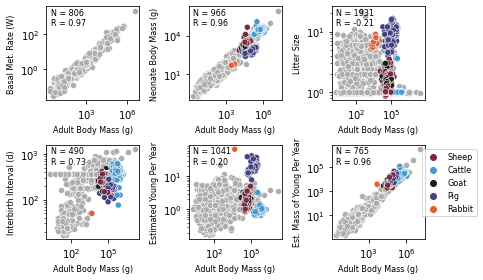

In [8]:
cols2plot_mammals = ['BMR_W', 'NeonateBodyMass (g)', 'LitterSize (number)',
                     'InterbirthInterval (d)', 'YoungPerYear_Estimated (number)', 'YoungMassPerYear_Estimated (g)',
                     'WeaningAge (days)', 'WeaningBodyMass (g)', ]
cols2plot_dad_is = [None, 'Birth weight AVG (g)', 'Litter size AVG', 'Parturition interval (day) AVG',
                    'Young per year AVG (number)', 'Young mass per year AVG (g)']

pretty_names_mammals = ['Basal Met. Rate (W)', 'Neonate Body Mass (g)', 'Litter Size',
                        'Interbirth Interval (d)', 'Estimated Young Per Year', 'Est. Mass of Young Per Year']
dad_is_species2plot = 'Cattle,Pig,Goat,Sheep,Rabbit'.split(',')
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(7,6))
flat_axs = axs.flatten()
greys = sns.color_palette('Greys')
pal = sns.color_palette('icefire', n_colors=5)
my_pal = dict(zip(dad_is_species2plot,pal))

# TODO: should we be using body mass data from Savage '04 where possible?
# What about species average body mass? Decide what to do here. 
xcol_mammals = 'AdultBodyMass (g)'
xcol_dad_is = 'Adult weight AVG (g)'
for i, (my_ax, ycol_mammals) in enumerate(zip(flat_axs, cols2plot_mammals)):
    plt.sca(my_ax)
    plt.xscale('log')
    plt.yscale('log')
    
    mask = np.logical_and(mammals_df[xcol_mammals] > 0,
                          mammals_df[ycol_mammals] > 0)
    sub_df = mammals_df[mask]
    sns.scatterplot(data=sub_df, x=xcol_mammals, y=ycol_mammals, legend=False,
                    color=greys[2])
    
    # Calculate pearson correlation of log-transformed data
    x_data = sub_df[xcol_mammals]
    y_data = sub_df[ycol_mammals]
    r_val = pearsonr(np.log10(x_data), np.log10(y_data))
    N_obs = x_data.size
    plt.text(0.05, 0.8, 'N = {0:d}\nR = {1:.2f}'.format(N_obs, r_val[0]),
             transform=my_ax.transAxes, fontsize=8)
    
    ycol_dad_is = cols2plot_dad_is[i]
    if ycol_dad_is:
        mask = np.logical_and(dad_is_df[xcol_dad_is] > 0,
                              dad_is_df[ycol_dad_is] > 0)
        mask = np.logical_and(mask, dad_is_df.Specie.isin(dad_is_species2plot))
        sub_df = dad_is_df[mask]
        sns.scatterplot(data=sub_df, x=xcol_dad_is, y=ycol_dad_is, hue='Specie',
                        palette=my_pal)
    
    plt.legend().set_visible(False)
    plt.xlabel('Adult Body Mass (g)', fontsize=8)
    plt.ylabel(pretty_names_mammals[i], fontsize=8)

plt.legend(fontsize=8, loc=1, bbox_to_anchor=(1.6, 1)).set_visible(True)

plt.tight_layout()
plt.savefig('../figures/merged_allometries.png', dpi=600, facecolor='w')
plt.show()

NameError: name 'pantheria_df' is not defined

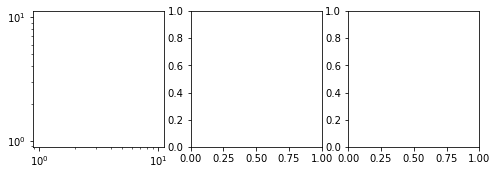

In [4]:
cols2plot_pantheria = ['NeonateBodyMass (g)', 'YoungPerYear_Estimated (number)', 'YoungMassPerYear_Estimated (g)']
cols2plot_dad_is = ['Birth weight AVG (g)', 'Young per year AVG (number)', 'Young mass per year AVG (g)']

pretty_names_pantheria = ['Neonate Body Mass (g)', 'Est. Young Per Year', 'Est. Young Mass Rate (g/yr)']
do_fitting = [True, False, True]
dad_is_species2plot = 'Cattle,Pig,Goat,Sheep,Rabbit'.split(',')

fig, axs = plt.subplots(ncols=3, figsize=(8,2.5))
flat_axs = axs.flatten()
pal = sns.color_palette('dark', n_colors=6)[1:]
my_pal = dict(zip(dad_is_species2plot,pal))

xcol_pantheria = 'AdultBodyMass (g)'
xcol_dad_is = 'Adult weight AVG (g)'
for i, (my_ax, ycol_pantheria) in enumerate(zip(flat_axs, cols2plot_pantheria)):
    plt.sca(my_ax)
    plt.xscale('log')
    plt.yscale('log')
    
    mask = np.logical_and(pantheria_df[xcol_pantheria] > 0,
                          pantheria_df[ycol_pantheria] > 0)
    pantheria_sub_df = pantheria_df[mask]
    sns.scatterplot(data=pantheria_sub_df, x=xcol_pantheria, y=ycol_pantheria,
                    hue='PlacentalMammal', palette=['grey', 'cornflowerblue'],
                    legend=False)
    
    ycol_dad_is = cols2plot_dad_is[i]
    mask = np.logical_and(dad_is_df[xcol_dad_is] > 0,
                          dad_is_df[ycol_dad_is] > 0)
    mask = np.logical_and(mask, dad_is_df.Specie.isin(dad_is_species2plot))
    dad_is_sub_df = dad_is_df[mask]
    sns.scatterplot(data=dad_is_sub_df, x=xcol_dad_is, y=ycol_dad_is, hue='Specie',
                    palette=my_pal)

    plt.legend().set_visible(False)
    plt.xlabel('Adult Body Mass (g)', fontsize=8)
    plt.ylabel(pretty_names_pantheria[i], fontsize=8)
    
    if not do_fitting[i]:
        continue
        
    # fit power law to the placental mammals (from pantheria) 
    eutheria_data = pantheria_sub_df[pantheria_sub_df.PlacentalMammal == True]

    # Note: power-law fitting code assumes log base e by exponentiating the fit intercept
    xs = eutheria_data[xcol_pantheria]
    ys = eutheria_data[ycol_pantheria]
    log_xs, log_ys = np.log(xs), np.log(ys)
    exp, pre, r = fit_power_law_odr(log_xs, log_ys)
    ys_pantheria_pred = np.power(xs, exp)*pre
    mape_pantheria = mean_absolute_percentage_error(ys, ys_pantheria_pred)
    
    # Evaluate goodness of fit on the livestock data
    xs_dad_is = dad_is_sub_df[xcol_dad_is]
    ys_dad_is = dad_is_sub_df[ycol_dad_is]
    ys_dad_is_pred = np.power(xs_dad_is, exp)*pre
    mape_livestock = mean_absolute_percentage_error(ys_dad_is, ys_dad_is_pred)
    
    t = plt.text(0.05, 0.9, '$MPE_w = {0:.2f}, MPE_l = {1:.2f}$'.format(mape_pantheria, mape_livestock),
                 fontsize=8, transform=my_ax.transAxes, backgroundcolor='w')
    t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='grey'))

plt.legend(fontsize=8, loc=1, bbox_to_anchor=(1.6, 1)).set_visible(True)

plt.tight_layout()
plt.savefig('../figures/young_mass_per_year.png', dpi=600, facecolor='w')
plt.show()

In [ ]:
ys.isnull().any()